# Task 4A - Haar Cascade
(with OpenCV)

In [9]:
import cv2 as cv
import os
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [30]:
def detect_and_display(frame, cascade, postfix):
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    
    plate = cascade.detectMultiScale(frame_gray, 1.2, 3) # 1.1 - detect all, some FP, 1.2 - not all, some FP, 1.3 - almost no FP, many FN

    for (x, y, w, h) in plate:
        center = (x + w // 2, y + h // 2)
        frame = cv.ellipse(frame, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)
    plt.figure()
    plt.title('Plate detection ' + postfix)
    plt.imshow(frame)
    #plt.('Plate detection - ' + postfix, frame)

In [12]:
plate_model_addr = './drive/MyDrive/Основы робототехники Базин Б18-503/haar_models/haarcascade_russian_plate_number.xml'
folder_pos = './drive/MyDrive/Основы робототехники Базин Б18-503/haar_data/positives'
folder_neg = './drive/MyDrive/Основы робототехники Базин Б18-503/haar_data/negatives'

In [14]:
plate_cascade = cv.CascadeClassifier(plate_model_addr)

In [15]:
os.listdir('./drive/MyDrive/Основы робототехники Базин Б18-503/haar_data/positives')

['w222-mercedes.jpg',
 'auto-002.jpg',
 '0d3ccda66a22-original.jpg',
 'armyanskiy-uchet-2.jpg',
 'soc_1019070.jpg',
 '999.jpg',
 'd68f6c313ab4b7788d641cd48736ebb2_XL.jpg',
 'dcrrtweaua4tp_1ap62kk.jpeg',
 'ff5a4be4d0f0d2a3bfde6631debc777867a38869.webp',
 'zamena_gos_nomera-300x236.jpg',
 'foto-nomera-ooo_03.jpg',
 'preview-32190272.jpg',
 '92d1f634_resizedScaled_1020to765.jpg',
 'scale_600.webp',
 'lg_ofpqld5w.jpg',
 'CKvpd4hY8l2x6ZoC6QbWIQ=s800.webp',
 '21-aa0003cc.jpg',
 '39512107e.jpg',
 'image.jpeg',
 'fixed1480x800_8abacb0c060ad7a42e39850cdf3439b9.webp']

In [31]:
for image in load_images_from_folder(folder_pos):
    detect_and_display(image, plate_cascade, 'positive sample')

Output hidden; open in https://colab.research.google.com to view.

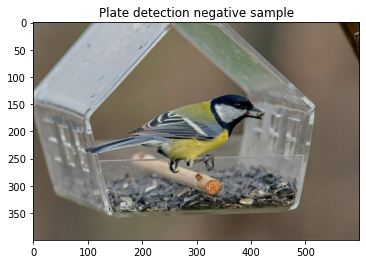

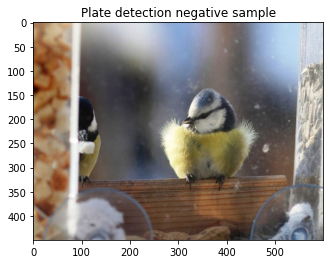

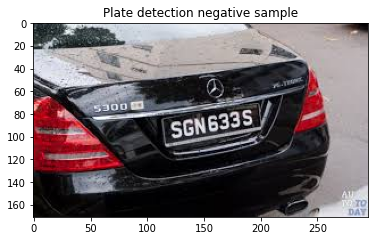

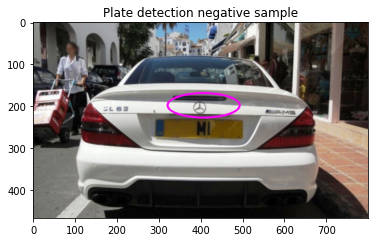

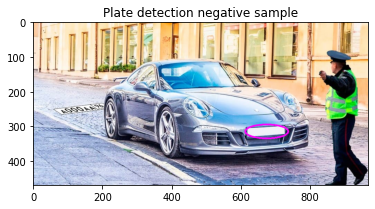

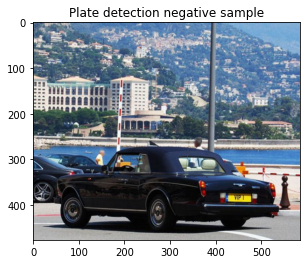

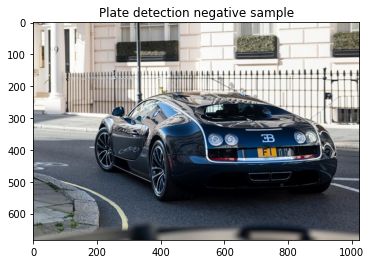

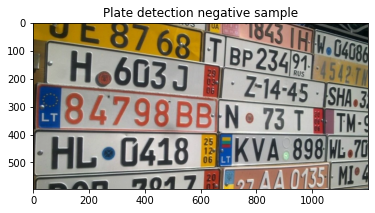

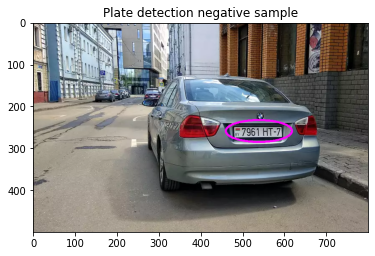

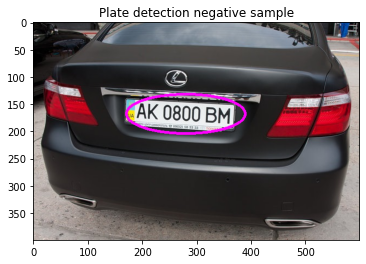

In [32]:
for image in load_images_from_folder(folder_neg):
    detect_and_display(image, plate_cascade, 'negative sample')